In [13]:
import numpy as np
import pandas as pd
import re
import os
import matplotlib
import matplotlib.pyplot as plt
import json

In [14]:
meshfile = open('8000_quads.txt','r'); #Read .txt file
trash = 30; 
read_lines = meshfile.readlines()[trash:] #Read lines function /skips first 30 lines of .txt file
matches = []
node_tags = []
el_tags = []
x_extraction = []; y_extraction = [];
node1 = []; node2 = []; node3 = []; node4 = [];
connect1 = []; connect2 = []; connect3 = []; connect4 = [];
#------------------------------------------------DATA EXTRACTION----------------------------------------------------------------
for line in read_lines: #For cycle to go over all lines in .txt
    #result.append(read_lines)
    if line.__contains__('GRID'): #Condition to read lines 'GRID (nodal points and its coordinates)'
        n_data = re.match("GRID\s+(\d+)\s{8}(.{8})(.{8})", line) #Matches all nodal data in ordered columns
        node_tags.append(int(n_data.group(1))) #Saves the numbers to 'node_tags' variable to store them globally
              
        col2 = n_data.group(2)
        col3 = n_data.group(3)
        
        if col2[4].__contains__('-'):
            col2 = col2[:4] + 'e-' + col2[5:]
            
        elif col2[5].__contains__('-'):
            col2 = col2[:5] + 'e-' + col2[6:]
        
        if col3[4].__contains__('-'):
            col3 = col3[:4] + 'e-' + col3[5:]
            
        elif col3[5].__contains__('-'):
            col3 = col3[:5] + 'e-' + col3[6:] 
            
        x_extraction.append(float(col2))      
        y_extraction.append(float(col3)) 

    try:
            el_data = re.match('CQUAD4\s+(\d+)\s+\d\s+(\d+)\s+(\d+)\s+(\d+)\s+(\d+)', line) 
            el_tags.append(int(el_data.group(1)))
            node1.append(int(el_data.group(2)))
            node2.append(int(el_data.group(3)))
            node3.append(int(el_data.group(4)))
            node4.append(int(el_data.group(5)))
            
    except AttributeError:
        pass;
 
 #----------------------------------------------DATA CONVERSION-----------------------------------------------------------------        

nnodes = len(node_tags)
nelements = len(el_tags)

for i in range(nelements):
    connect1.append(node_tags.index(node1[i]))
    connect2.append(node_tags.index(node2[i]))
    connect3.append(node_tags.index(node3[i]))
    connect4.append(node_tags.index(node4[i]))

node_tags = np.array(list(range(0, nnodes)))

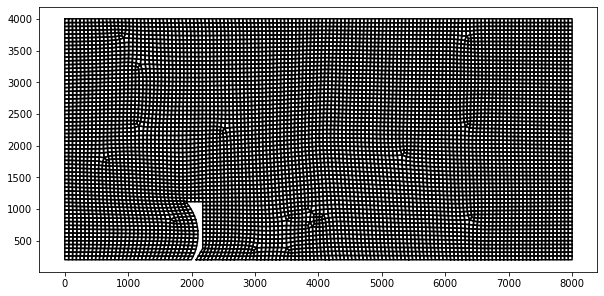

In [15]:
x1 = []; x2 = []; x3 = []; x4 = [];
y1 = []; y2 = []; y3 = []; y4 = [];

for i in range(nelements):

     x1.append(x_extraction[connect1[i]])  
     x2.append(x_extraction[connect2[i]]) 
     x3.append(x_extraction[connect3[i]]) 
     x4.append(x_extraction[connect4[i]]) 

     y1.append(y_extraction[connect1[i]])  
     y2.append(y_extraction[connect2[i]]) 
     y3.append(y_extraction[connect3[i]]) 
     y4.append(y_extraction[connect4[i]])

xxx = [x1,x2,x3,x4,x1]
yyy = [y1,y2,y3,y4,y1]


fig = plt.figure
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(xxx,yyy, color = 'black')
plt.axis('scaled')
plt.draw() 

#plt.savefig('figure_name.png', dpi = 500)



In [16]:
#------------------------------------------------------------------CENTRAL NODES---------------------
dx_coord = []; dy_coord = [];

#for i in range(nelements):
 #   dx_coord.append(((x_extraction[node_tags[connect1[i]]])-(x_extraction[node_tags[connect4[i]]]))/2+(x_extraction[node_tags[connect4[i]]]))
  #  dy_coord.append(((y_extraction[node_tags[connect2[i]]])-(y_extraction[node_tags[connect1[i]]]))/2+(y_extraction[node_tags[connect1[i]]]))

#fig = plt.figure
#plt.rcParams["figure.figsize"] = (5,5)
plt.scatter(dx_coord,dy_coord)